In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request


In [2]:

# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))


Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_gk = pd.read_csv('final_gk.csv')
gk_pas_2023=pd.read_csv('gk_pas_2023.csv')
gk_pas_2022=pd.read_csv('gk_pas_2022.csv')
gk_pas_2021=pd.read_csv('gk_pas_2021.csv')
newbie=pd.read_csv('newbie.csv')
# Fill missing values with 0 in place
final_gk.fillna(0, inplace=True)
gk_pas_2023.fillna(0, inplace=True)
gk_pas_2022.fillna(0, inplace=True)
gk_pas_2021.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,33-281,1990.0,122.0,122.0,10980.0,122.0,209.0,1.71,589.0,379.0,64.0,41.0,27.0,54.0,20.0,16.0,21.0,12.0,6.0,3.0,29.0,3.0,29.0,5.0,199.1,0.34,-4.9,-0.04,618.0,1686.0,37.0,4405.0,650.0,30.0,31.200,853.0,40.0,36.33,1752.0,107.0,6.0,212.0,1.74,65.30,342.0,1339.0,4083.0,4908.0,77.0,102161.0,71630.0,1055.0,1057.0,100.0,1917.0,1940.0,99.0,1064.0,2209.0,48.0,0.0,0.2,0.4,0.8,3.0,80.0,3.0,0.0,4.0,2.0,11.0,0.09,0.00,4413.0,5531.0,77.0,5600.0,3292.0,2908.0,36.17,45.34,0.63,45.90,26.98,23.84,4.0,0.0,0.0,0.0,0.0,4.0,0.02
1,1,Gregor Kobel,ch SUI,GK,Dortmund+Stuttgart,de Bundesliga,26-094,1997.0,109.0,109.0,9700.0,107.8,150.0,1.39,480.0,332.0,69.0,60.0,22.0,27.0,29.0,27.0,17.0,14.0,3.0,0.0,18.0,3.0,18.0,5.0,152.5,0.32,7.5,0.07,396.0,1013.0,39.0,3361.0,552.0,23.0,28.250,781.0,32.0,33.95,1368.0,54.0,4.0,141.0,1.31,61.60,249.0,761.0,3441.0,3785.0,83.0,82280.0,53597.0,906.0,906.0,100.0,1683.0,1700.0,99.0,809.0,1490.0,54.0,0.0,0.1,0.2,-0.1,1.0,44.0,3.0,0.0,1.0,1.0,12.0,0.11,0.00,3577.0,4403.0,23.0,4425.0,2576.0,2295.0,33.18,40.84,0.21,41.05,23.90,21.29,4.0,0.0,0.0,0.0,0.0,4.0,0.01
2,2,Unai Simón,es ESP,GK,Athletic Club,es La Liga,26-272,1997.0,129.0,129.0,11565.0,128.5,134.0,1.04,419.0,290.0,69.0,51.0,38.0,40.0,43.0,33.0,13.0,11.0,2.0,0.0,15.0,2.0,11.0,7.0,128.1,0.31,1.1,0.01,659.0,1738.0,38.0,2999.0,656.0,38.0,35.350,877.0,67.0,51.22,1758.0,93.0,5.0,149.0,1.16,65.50,589.0,1145.0,2668.0,3756.0,69.0,80377.0,61992.0,414.0,417.0,99.0,1287.0,1314.0,98.0,963.0,2138.0,45.0,0.0,0.0,0.2,0.0,2.0,71.0,3.0,0.0,4.0,1.0,18.0,0.14,0.00,3318.0,4064.0,26.0,4088.0,2189.0,1653.0,25.82,31.63,0.20,31.81,17.04,12.86,4.0,0.0,4.0,0.0,0.0,0.0,0.01
3,3,Pau López,es ESP,GK,Marseille+Roma,fr Ligue 1+it Serie A,29-087,1994.0,106.0,104.0,9391.0,104.4,118.0,1.13,379.0,265.0,70.0,55.0,23.0,26.0,30.0,28.0,12.0,12.0,0.0,0.0,0.0,2.0,21.0,4.0,109.8,0.29,-4.2,-0.04,313.0,944.0,33.0,3380.0,463.0,22.0,28.720,537.0,39.0,35.52,1095.0,57.0,5.0,131.0,1.25,66.70,209.0,732.0,3185.0,4068.0,81.0,76884.0,48669.0,698.0,701.0,100.0,1715.0,1737.0,99.0,755.0,1460.0,52.0,0.0,1.1,0.4,1.9,5.0,48.0,2.0,0.0,5.0,4.0,24.0,0.23,0.00,2715.0,3999.0,128.0,4125.0,2879.0,2343.0,26.01,38.30,1.23,39.51,27.58,22.44,4.0,0.0,0.0,1.0,3.0,0.0,0.04
4,4,Jeremías Ledesma,ar ARG,GK,Cádiz,es La Liga,31-025,1993.0,128.0,128.0,11508.0,127.9,180.0,1.41,590.0,407.0,69.0,29.0,46.0,53.0,38.0,30.0,33.0,29.0,4.0,0.0,12.0,3.0,22.0,1.0,

In [4]:
final_gk.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Goals_Against', 'Goals_Against_per90',
       'Shots_on_Target_Against', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%',
       'PK_attempts', 'PK_Allowed', 'PKs_Saved', 'PK_missed',
       'Save%(Penalty Kicks)', 'Gk_free_kick_goals_against',
       'Gk_corner_kick_goals_against', 'Gk_own_goals_against', 'Gk_psxg',
       'Gk_psxg_per_shot_on_target_against', 'Gk_psxg_diff',
       'Gk_psxg_net_per90', 'Gk_passes_completed_launched',
       'Gk_passes_attempted_launched', 'Gk_passes_pct_launched', 'Gk_passes',
       'Gk_passes_throws', 'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
       'Gk_go

In [5]:
Onana=pd.read_csv('Onana_CL.csv')
Onana

,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90
0,0,0,0,0,0,0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0


In [6]:
# Defining a function to check if a league is in the 'Comp' column
def check_league_in_comp(row, league):
    if league in row['Comp']:
        return 1
    else:
        return 0

# Adding the new columns
Onana['Seasons at top 5'] = 1
Onana['Seasons in PL'] = Onana.apply(lambda row: check_league_in_comp(row, 'eng Premier League'), axis=1)
Onana['Seasons in Liga'] = Onana.apply(lambda row: check_league_in_comp(row, 'es La Liga'), axis=1)
Onana['Seasons in Serie A'] = 1
Onana['Seasons in Ligue 1'] = Onana.apply(lambda row: check_league_in_comp(row, 'fr Ligue 1'), axis=1)
Onana['Seasons in Bundesliga'] = Onana.apply(lambda row: check_league_in_comp(row, 'de Bundesliga'), axis=1)
Onana

,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,0,0,0,0,0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0,1,0,0,1,0,0


In [7]:
final_gk = final_gk[final_gk['90s'] >= 19]
final_gk = final_gk[~(final_gk['Player'] == 'André Onana')]
final_gk = final_gk.reset_index(drop=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,33-281,1990.0,122.0,122.0,10980.0,122.0,209.0,1.71,589.0,379.0,64.0,41.0,27.0,54.0,20.0,16.0,21.0,12.0,6.0,3.0,29.0,3.0,29.0,5.0,199.1,0.34,-4.9,-0.04,618.0,1686.0,37.0,4405.0,650.0,30.0,31.200,853.0,40.0,36.33,1752.0,107.0,6.0,212.0,1.74,65.30,342.0,1339.0,4083.0,4908.0,77.0,102161.0,71630.0,1055.0,1057.0,100.0,1917.0,1940.0,99.0,1064.0,2209.0,48.0,0.0,0.2,0.4,0.8,3.0,80.0,3.0,0.0,4.0,2.0,11.0,0.09,0.00,4413.0,5531.0,77.0,5600.0,3292.0,2908.0,36.17,45.34,0.63,45.90,26.98,23.84,4.0,0.0,0.0,0.0,0.0,4.0,0.02
1,1,Gregor Kobel,ch SUI,GK,Dortmund+Stuttgart,de Bundesliga,26-094,1997.0,109.0,109.0,9700.0,107.8,150.0,1.39,480.0,332.0,69.0,60.0,22.0,27.0,29.0,27.0,17.0,14.0,3.0,0.0,18.0,3.0,18.0,5.0,152.5,0.32,7.5,0.07,396.0,1013.0,39.0,3361.0,552.0,23.0,28.250,781.0,32.0,33.95,1368.0,54.0,4.0,141.0,1.31,61.60,249.0,761.0,3441.0,3785.0,83.0,82280.0,53597.0,906.0,906.0,100.0,1683.0,1700.0,99.0,809.0,1490.0,54.0,0.0,0.1,0.2,-0.1,1.0,44.0,3.0,0.0,1.0,1.0,12.0,0.11,0.00,3577.0,4403.0,23.0,4425.0,2576.0,2295.0,33.18,40.84,0.21,41.05,23.90,21.29,4.0,0.0,0.0,0.0,0.0,4.0,0.01
2,2,Unai Simón,es ESP,GK,Athletic Club,es La Liga,26-272,1997.0,129.0,129.0,11565.0,128.5,134.0,1.04,419.0,290.0,69.0,51.0,38.0,40.0,43.0,33.0,13.0,11.0,2.0,0.0,15.0,2.0,11.0,7.0,128.1,0.31,1.1,0.01,659.0,1738.0,38.0,2999.0,656.0,38.0,35.350,877.0,67.0,51.22,1758.0,93.0,5.0,149.0,1.16,65.50,589.0,1145.0,2668.0,3756.0,69.0,80377.0,61992.0,414.0,417.0,99.0,1287.0,1314.0,98.0,963.0,2138.0,45.0,0.0,0.0,0.2,0.0,2.0,71.0,3.0,0.0,4.0,1.0,18.0,0.14,0.00,3318.0,4064.0,26.0,4088.0,2189.0,1653.0,25.82,31.63,0.20,31.81,17.04,12.86,4.0,0.0,4.0,0.0,0.0,0.0,0.01
3,3,Pau López,es ESP,GK,Marseille+Roma,fr Ligue 1+it Serie A,29-087,1994.0,106.0,104.0,9391.0,104.4,118.0,1.13,379.0,265.0,70.0,55.0,23.0,26.0,30.0,28.0,12.0,12.0,0.0,0.0,0.0,2.0,21.0,4.0,109.8,0.29,-4.2,-0.04,313.0,944.0,33.0,3380.0,463.0,22.0,28.720,537.0,39.0,35.52,1095.0,57.0,5.0,131.0,1.25,66.70,209.0,732.0,3185.0,4068.0,81.0,76884.0,48669.0,698.0,701.0,100.0,1715.0,1737.0,99.0,755.0,1460.0,52.0,0.0,1.1,0.4,1.9,5.0,48.0,2.0,0.0,5.0,4.0,24.0,0.23,0.00,2715.0,3999.0,128.0,4125.0,2879.0,2343.0,26.01,38.30,1.23,39.51,27.58,22.44,4.0,0.0,0.0,1.0,3.0,0.0,0.04
4,4,Jeremías Ledesma,ar ARG,GK,Cádiz,es La Liga,31-025,1993.0,128.0,128.0,11508.0,127.9,180.0,1.41,590.0,407.0,69.0,29.0,46.0,53.0,38.0,30.0,33.0,29.0,4.0,0.0,12.0,3.0,22.0,1.0,

In [8]:
Onana

,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,0,0,0,0,0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0,1,0,0,1,0,0


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk_scaled = scaler.fit_transform(final_gk[relevant_columns])
onana_scaled = scaler.transform(Onana[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Onana[relevant_columns], final_gk[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(onana_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(onana_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final_gk['Player'], 'Similarity': cosine_similarity_signed[0],'League':final_gk['Comp'],'Squad':final_gk['Squad'],'Age':final_gk['Age'],'Seasons at top 5': final_gk['Seasons at top 5'],'Seasons in PL': final_gk['Seasons in PL'] ,'Seasons in Liga':final_gk['Seasons in Liga'],'Seasons in Serie A':final_gk['Seasons in Serie A'],'Seasons in Ligue 1': final_gk['Seasons in Ligue 1'],'Seasons in Bundesliga':final_gk['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [10]:
similarity_df

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Paulo Gazzaniga,0.720581,es La Liga,Girona,32-067,2.0,0.0,2.0,0.0,0.0,0.0
1,Michele Di Gregorio,0.708489,it Serie A,Monza,26-226,2.0,0.0,0.0,2.0,0.0,0.0
2,Brice Samba,0.681110,fr Ligue 1,Lens,29-319,2.0,0.0,0.0,0.0,2.0,0.0
3,Marcin Bułka,0.680934,fr Ligue 1,Nice,24-157,0.0,0.0,0.0,0.0,0.0,0.0
4,Benjamin Lecomte,0.639105,fr Ligue 1+es La Liga+fr Ligue 1,Montpellier+Espanyol+Montpellier,32-318,2.0,0.0,1.0,0.0,2.0,0.0
5,Moritz Nicolas,0.636816,de Bundesliga,M'Gladbach,26-140,0.0,0.0,0.0,0.0,0.0,0.0
6,Arthur Desmas,0.609447,fr Ligue 1,Le Havre,29-337,0.0,0.0,0.0,0.0,0.0,0.0
7,Mory Diaw,0.602852,fr Ligue 1,Clermont Foot,30-261,2.0,0.0,0.0,0.0,2.0,0.0
8,Steve Mandanda,0.598756,fr Ligue 1,Rennes,38-347,2.0,0.0,0.0,0.0,2.0,0.0
9,Frederik Rønnow,0.578743,de Bundesliga,Union Berlin,31-218,2.0,0.0,0.0,0.0,0.0,2.0


In [11]:
Diouf=gk_pas_2023[gk_pas_2023['Player']=='Yehvann Diouf']
Diouf

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
24,40,40,40,Yehvann Diouf,fr FRA,GK,Reims,fr Ligue 1,22,1999,31,31,2790,31.0,31.0,1.0,137.0,107.0,78.1,11,12.0,8.0,14.0,45.2,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,37.0,0.27,7.0,0.22,136,308,44.2,874.0,191,28.3,31.8,185.0,33.0,34.3,430.0,40.0,9.3,35.0,1.13,12.7,61,247,851.0,1063.0,80.1,23462.0,15373.0,97.0,98.0,99.0,460.0,466.0,98.7,289.0,490.0,59.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,1.0,4.0,0.13,0.03,914.0,1131.0,7.0,1138.0,843.0,543.0,29.48,36.48,0.23,36.71,27.19,17.52


In [12]:
Samba=gk_pas_2023[gk_pas_2023['Player']=='Brice Samba']
Samba

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
95,159,159,169,Brice Samba,fr FRA,GK,Lens,fr Ligue 1,28,1994,37,37,3330,37.0,28.0,0.76,125.0,98.0,80.0,24,9.0,4.0,15.0,40.5,3.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,32.4,0.24,5.4,0.15,174,435,40.0,1075.0,140,35.5,33.3,160.0,33.1,32.7,384.0,34.0,8.9,41.0,1.11,15.4,52,381,938.0,1237.0,75.8,25038.0,16717.0,208.0,209.0,99.5,395.0,402.0,98.3,320.0,607.0,52.7,0.0,0.1,0.0,-0.1,1.0,17.0,1.0,0.0,1.0,0.0,3.0,0.08,0.0,942.0,1291.0,18.0,1307.0,987.0,712.0,25.46,34.89,0.49,35.32,26.68,19.24


In [13]:
Diaw=gk_pas_2023[gk_pas_2023['Player']=='Mory Diaw']
Diaw

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
22,38,38,38,Mory Diaw,sn SEN,GK,Clermont Foot,fr Ligue 1,29,1993,37,37,3330,37.0,47.0,1.27,161.0,110.0,75.8,17,8.0,12.0,10.0,27.0,12.0,8.0,4.0,0.0,33.3,0.0,5.0,0.0,55.4,0.28,8.4,0.23,235,601,39.1,1209.0,173,40.0,37.0,255.0,45.9,40.4,464.0,34.0,7.3,25.0,0.68,11.5,117,483,1034.0,1467.0,70.5,30947.0,21906.0,160.0,163.0,98.2,455.0,467.0,97.4,412.0,826.0,49.9,0.0,0.2,0.1,-0.2,4.0,34.0,3.0,0.0,0.0,0.0,7.0,0.19,0.0,1266.0,1549.0,12.0,1561.0,1064.0,698.0,34.22,41.86,0.32,42.19,28.76,18.86


In [14]:

df_goalkeepers = gk_pas_2023.reset_index(drop=True)

df_goalkeepers = pd.concat([df_goalkeepers, Onana], ignore_index=True)


In [15]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
onana_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[-1]],0)

# Print the percentile ranks for André Onana
print(onana_percentile_ranks)


     Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
124                  7.0   95.0              100.0                    74.0   

     Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
124               75.0               81.0                50.0   

     Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
124              81.0                        84.0                    94.0   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
124                    81.0                    70.0   

     Tocuhes_Live_Balls_per_90  Carries_per_90  Passes_Received_per_90  
124                       82.0            86.0                    82.0  


In [16]:
onana_percentile_ranks_list = onana_percentile_ranks.values.flatten().tolist()
onana_percentile_ranks_list[0] = 100 - onana_percentile_ranks_list[0] 
onana_percentile_ranks_list

[93.0,
 95.0,
 100.0,
 74.0,
 75.0,
 81.0,
 50.0,
 81.0,
 84.0,
 94.0,
 81.0,
 70.0,
 82.0,
 86.0,
 82.0]

In [17]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of Samba's stats from the percentile ranks DataFrame
samba_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Samba
print(samba_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
95                  6.0   94.0               84.0                    93.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
95               64.0               56.0                50.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
95              74.0                        29.0                     9.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
95                    35.0                    72.0                       36.0   

    Carries_per_90  Passes_Received_per_90  
95            80.0                    61.0  


In [18]:
samba_percentile_ranks_list = samba_percentile_ranks.values.flatten().tolist()
samba_percentile_ranks_list[0] = 100 - samba_percentile_ranks_list[0] 
samba_percentile_ranks_list

[94.0,
 94.0,
 84.0,
 93.0,
 64.0,
 56.0,
 50.0,
 74.0,
 29.0,
 9.0,
 35.0,
 72.0,
 36.0,
 80.0,
 61.0]

In [19]:
import pandas as pd






params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of Mory Diaw's stats from the percentile ranks DataFrame
diaw_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[22]],0)

# Print the percentile ranks for Mory Diaw

print(diaw_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
22                 42.0   83.0               93.0                    77.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
22               44.0               15.0                20.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
22              63.0                        64.0                    79.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
22                    82.0                    63.0                       79.0   

    Carries_per_90  Passes_Received_per_90  
22            90.0                    60.0  


In [20]:
diaw_percentile_ranks_list = diaw_percentile_ranks.values.flatten().tolist()
diaw_percentile_ranks_list[0] = 100 - diaw_percentile_ranks_list[0] 
diaw_percentile_ranks_list

[58.0,
 83.0,
 93.0,
 77.0,
 44.0,
 15.0,
 20.0,
 63.0,
 64.0,
 79.0,
 82.0,
 63.0,
 79.0,
 90.0,
 60.0]

In [21]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
diouf_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[22]],0)

# Print the percentile ranks for Diouf
print(diouf_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
22                 42.0   83.0               93.0                    77.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
22               44.0               15.0                20.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
22              63.0                        64.0                    79.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
22                    82.0                    63.0                       79.0   

    Carries_per_90  Passes_Received_per_90  
22            90.0                    60.0  


In [22]:
diouf_percentile_ranks_list = diouf_percentile_ranks.values.flatten().tolist()
diouf_percentile_ranks_list[0] = 100 - diouf_percentile_ranks_list[0] 
diouf_percentile_ranks_list

[58.0,
 83.0,
 93.0,
 77.0,
 44.0,
 15.0,
 20.0,
 63.0,
 64.0,
 79.0,
 82.0,
 63.0,
 79.0,
 90.0,
 60.0]

In [23]:
import matplotlib.pyplot as plt
from mplsoccer import  PyPizza

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

In [24]:


image_path = "Onana.png"
fdj_cropped = Image.open(image_path)


In [25]:
image_path='Samba.jpg'
dj_cropped = Image.open(image_path)

In [26]:
image_path='diaw.jpeg'
j_cropped = Image.open(image_path)

In [27]:
image_path='Diouf.jpg'
j= Image.open(image_path)

In [28]:
split_params = [param.replace('_', '\n') for param in params]


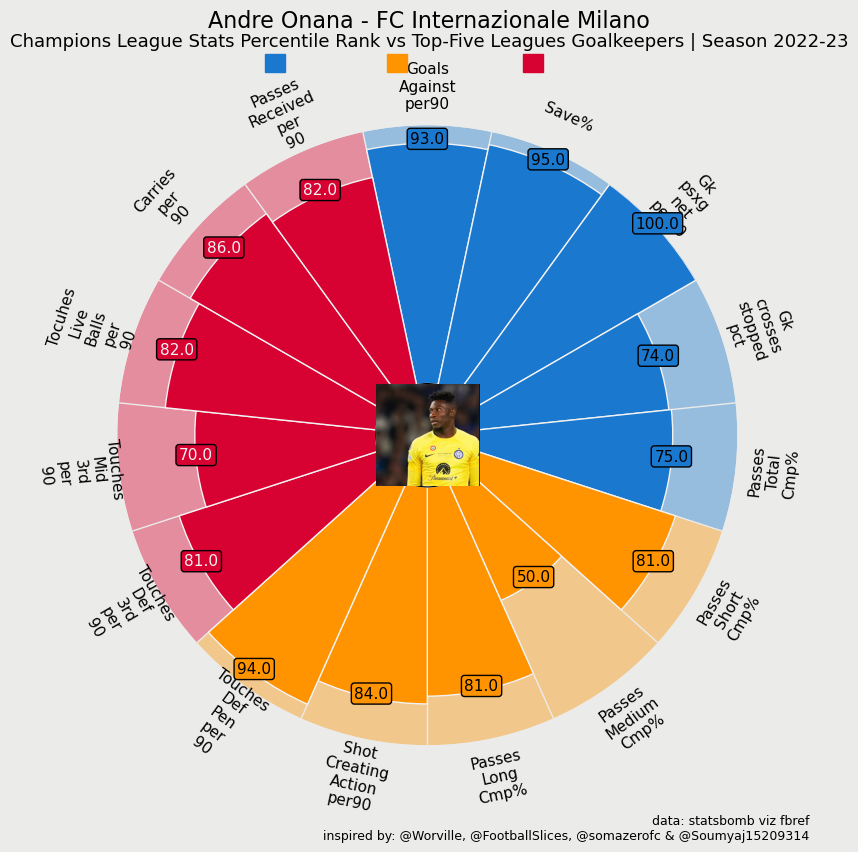

In [29]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    onana_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Andre Onana - FC Internazionale Milano", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Champions League Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Onana_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


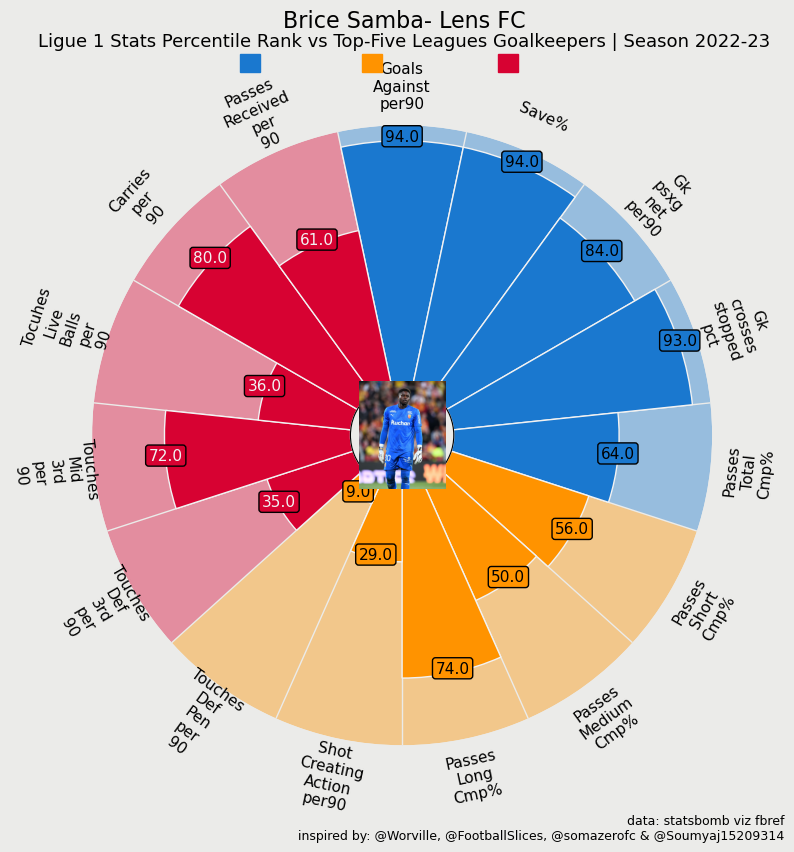

In [30]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    samba_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Brice Samba- Lens FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
dj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Samba_Percentile.png',dpi=500,bbox_inches = 'tight')


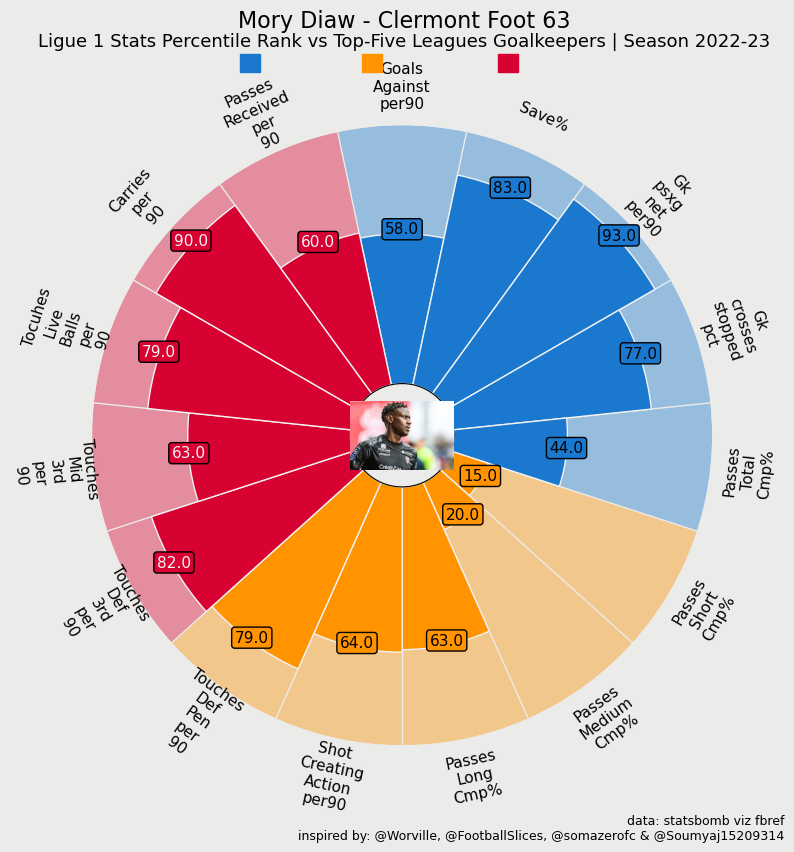

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    diaw_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Mory Diaw - Clermont Foot 63", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
j_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Diaw_Percentile.png',dpi=500,bbox_inches = 'tight')


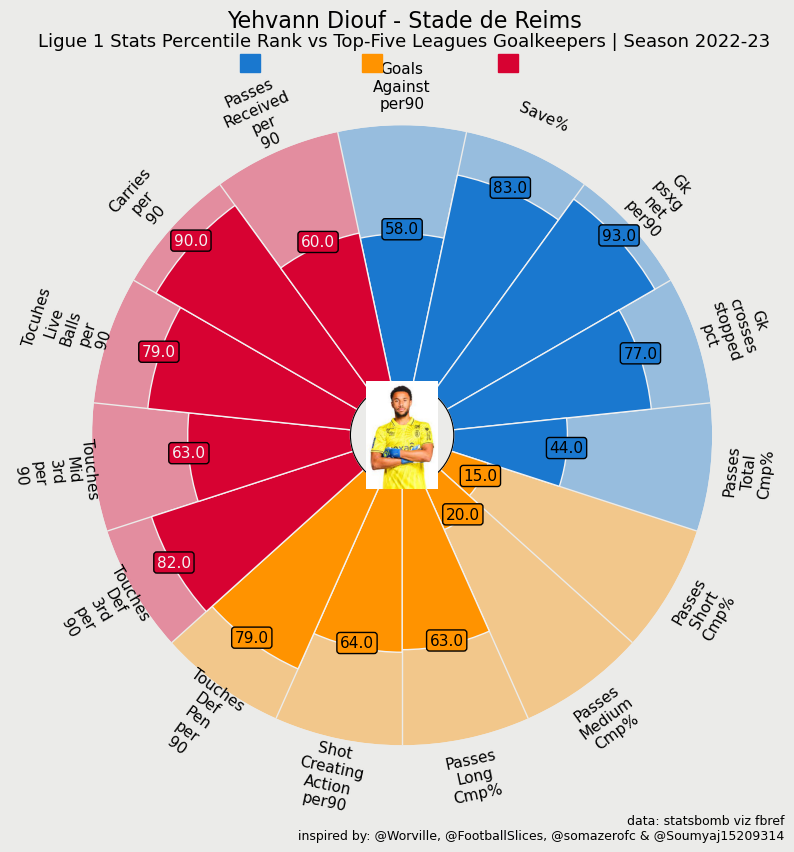

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    diouf_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Yehvann Diouf - Stade de Reims", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
j, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Diouf_Percentile.png',dpi=500,bbox_inches = 'tight')


In [33]:
# Get the names of newbie goalkeepers
newbie_goalkeepers_names = set(newbie['Player'])

# Filter out newbie goalkeepers from final_gk DataFrame
final = final_gk[~final_gk['Player'].isin(newbie_goalkeepers_names)]

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk_scaled = scaler.fit_transform(final[relevant_columns])
onana_scaled = scaler.transform(Onana[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Onana[relevant_columns], final[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(onana_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(onana_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final['Player'], 'Similarity': cosine_similarity_signed[0],'League':final['Comp'],'Squad':final['Squad'],'Age':final['Age'],'Seasons at top 5': final['Seasons at top 5'],'Seasons in PL': final['Seasons in PL'] ,'Seasons in Liga':final['Seasons in Liga'],'Seasons in Serie A':final['Seasons in Serie A'],'Seasons in Ligue 1': final['Seasons in Ligue 1'],'Seasons in Bundesliga':final['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [35]:
similarity_df

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Paulo Gazzaniga,0.825214,es La Liga,Girona,32-067,2.0,0.0,2.0,0.0,0.0,0.0
1,Brice Samba,0.801734,fr Ligue 1,Lens,29-319,2.0,0.0,0.0,0.0,2.0,0.0
2,Michele Di Gregorio,0.794767,it Serie A,Monza,26-226,2.0,0.0,0.0,2.0,0.0,0.0
3,Benjamin Lecomte,0.734859,fr Ligue 1+es La Liga+fr Ligue 1,Montpellier+Espanyol+Montpellier,32-318,2.0,0.0,1.0,0.0,2.0,0.0
4,Frederik Rønnow,0.732522,de Bundesliga,Union Berlin,31-218,2.0,0.0,0.0,0.0,0.0,2.0
5,Mory Diaw,0.725269,fr Ligue 1,Clermont Foot,30-261,2.0,0.0,0.0,0.0,2.0,0.0
6,Steve Mandanda,0.706809,fr Ligue 1,Rennes,38-347,2.0,0.0,0.0,0.0,2.0,0.0
7,Lucas Chevalier,0.700091,fr Ligue 1,Lille,22-124,2.0,0.0,0.0,0.0,2.0,0.0
8,Yehvann Diouf,0.689705,fr Ligue 1,Reims,24-114,2.0,0.0,0.0,0.0,2.0,0.0
9,Kepa Arrizabalaga,0.680091,es La Liga+eng Premier League,Real Madrid+Chelsea,29-158,2.0,1.0,1.0,0.0,0.0,0.0


In [36]:
final[final_gk['Player']=='Paulo Gazzaniga']

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
55,55,Paulo Gazzaniga,ar ARG,GK,Girona,es La Liga,32-067,1992.0,55.0,55.0,4950.0,55.0,70.0,1.27,245.0,174.0,71.0,29.0,13.0,13.0,13.0,24.0,9.0,6.0,1.0,2.0,11.0,0.0,11.0,0.0,80.9,0.33,10.9,0.2,256.0,715.0,36.0,1641.0,267.0,29.0,31.4,423.0,56.0,46.65,877.0,66.0,8.0,56.0,1.02,13.5,238.0,473.0,1555.0,2073.0,75.0,40575.0,29739.0,395.0,396.0,100.0,738.0,753.0,98.0,415.0,906.0,46.0,0.0,0.9,0.0,-0.9,3.0,33.0,2.0,0.0,0.0,1.0,12.0,0.22,0.0,1880.0,2191.0,14.0,2205.0,1325.0,1079.0,34.18,39.84,0.25,40.09,24.09,19.62,2.0,0.0,2.0,0.0,0.0,0.0,0.02


In [37]:
final[final_gk['Player']=='Brice Samba']

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
58,58,Brice Samba,fr FRA,GK,Lens,fr Ligue 1,29-319,1994.0,61.0,61.0,5490.0,61.0,52.0,0.85,223.0,172.0,77.0,35.0,15.0,11.0,26.0,43.0,9.0,7.0,1.0,1.0,11.0,0.0,12.0,2.0,64.8,0.29,14.8,0.24,293.0,704.0,42.0,1767.0,246.0,34.0,32.6,283.0,34.0,31.9,664.0,60.0,9.0,58.0,0.95,14.3,95.0,607.0,1581.0,2055.0,77.0,42019.0,28297.0,339.0,340.0,100.0,685.0,695.0,99.0,531.0,986.0,54.0,0.0,0.2,0.2,-0.2,2.0,30.0,2.0,0.0,2.0,1.0,9.0,0.15,0.0,1626.0,2148.0,31.0,2177.0,1615.0,1147.0,26.66,35.21,0.51,35.69,26.48,18.8,2.0,0.0,0.0,0.0,2.0,0.0,0.02
